---

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.


---

Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

---
### Descripcion de las columnas del dataset

Grupo: Antecedentes del paciente
* EDAD: Edad del paciente

---

Grupo: Morbilidad asociada al paciente
* DIABETES: indica si el paciente tiene diabetes o no
* HOSPITALIZACION ULTIMO MES: Indica si el paciente fue hospitalizado el mes previo al procedimiento
* CUP: Uso de cateter urinario al momento de la biopsia
* ENF. CRONICA PULMONAR OBSTRUCTIVA: Indica si el paciente tiene una enfermedad pulmonar obstructiva
* VOLUMEN PROSTATICO: Indica si el volumen prostatico es mayor a 40cm3

---
Grupo: Antecedentes relacionados con la toma de la biopsia
* PSA: Concentracion de PSA en sangre
* BIOPSIAS PREVIAS: indica si el paciente ha tendido biopsias previas
* ANTIBIOTICO UTILIZADO EN LA PROFILAXIS: Indica el tipo de antibiotico utilizado en la profilaxis
* NUMERO DE MUESTRAS TOMADAS: Numero de muestras tomadas en la biopsia
* BIOPSIA: resultado de la biopsia

---
Grupo: Complicaciones infecciosas
* NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACION INFECCIOSA: Indica el tiempo al cual se presenta la complicacion infecciosa con un maximo de 30 dias
* FIEBRE: Indica si el paciente presenta fiebre
* ITU: Indica si el paciente presenta infeccion del tracto urinario
* TIPO DE CULTIVO: tipo de cultivo encontrado
* AGENTE AISLADO: tipo de agente aislado
* PATRON DE RESISTENCIA: Indica si presenta algun patron de resistencia
* HOSPITALIZACION: indica si el paciente fue hospitalizado luego del procedimiento
* DIAS HOSPITALIZACION MQ: indica los dias de hospitalizacion medico quirurgico
* DIAS HOSPITALIZACION UPC: indica los dias de hospitalizacion en estado critico

---

---
## Importamos las librerias necesarias

---

In [19]:
# Zona de imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
### Cargamos el dataset

---

In [20]:
df = pd.read_excel("BBDD_Hospitalización.xlsx")
df.head()

c:\Users\kuens\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


---
### Mostramos las columnas, con sus tipos

---

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

---
### Hay datos faltantes ? (NaN)


---

In [22]:
# Donde estan los datos faltantes?
df.isna().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

---
### Nuestro target es la columna **Hospitalización**

1. Elimino las filas que tienen missing data en la columna Hospitalización

---

In [23]:
# Primero que nada elimino las filas que tienen Nan en la columna hospitalizacion
mask = df["HOSPITALIZACION"].isna()
indexDrop = df[ mask ].index
df.drop(indexDrop , inplace=True)

df.isna().sum()

EDAD                                                                          0
DIABETES                                                                      0
HOSPITALIZACIÓN ULTIMO MES                                                    0
PSA                                                                           4
BIOPSIAS PREVIAS                                                              2
VOLUMEN PROSTATICO                                                            1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       0
NUMERO DE MUESTRAS TOMADAS                                                    0
CUP                                                                           1
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
BIOPSIA                                                                       0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                  

---
### Cuantos datos tenemos en total?

---

In [24]:
df.shape

(565, 20)

---
### Cuantos pacientes fueron hospitalizados y cuantos no

---

In [25]:
list(df["HOSPITALIZACION"].unique())

['SI', 'NO']

In [26]:
mask = df["HOSPITALIZACION"]=="SI"
nro_hospitalizados = df[mask].shape[0]
nro_no_hospitalizados = df[~mask].shape[0]
print("Cantidad de pacientes hospitalizados --> ", nro_hospitalizados)
print("Cantidad de pacientes NO hospitalizados --> ", nro_no_hospitalizados)

Cantidad de pacientes hospitalizados -->  24
Cantidad de pacientes NO hospitalizados -->  541


---
### Tenemos muy pocos pacientes hospitalizados

Vamos a ver si los datos faltantes coinciden con los hospitalizados

---

In [27]:
faltantes = df.isna().sum()
mask = faltantes!=0
faltantes = faltantes[mask]
faltantes

PSA                                   4
BIOPSIAS PREVIAS                      2
VOLUMEN PROSTATICO                    1
CUP                                   1
ENF. CRONICA PULMONAR OBSTRUCTIVA     2
AGENTE AISLADO                       17
dtype: int64

In [28]:
lista_faltantes = list(faltantes.index)

for f in lista_faltantes:
    df2 = df.loc[df[f].isna(),[f,"HOSPITALIZACION"]]
    print(df2)
    print("----------------------------------------------------")


     PSA HOSPITALIZACION
9    NaN              SI
76   NaN              NO
103  NaN              NO
121  NaN              NO
----------------------------------------------------
    BIOPSIAS PREVIAS HOSPITALIZACION
92               NaN              NO
565              NaN              NO
----------------------------------------------------
    VOLUMEN PROSTATICO HOSPITALIZACION
565                NaN              NO
----------------------------------------------------
     CUP HOSPITALIZACION
565  NaN              NO
----------------------------------------------------
    ENF. CRONICA PULMONAR OBSTRUCTIVA HOSPITALIZACION
566                               NaN              NO
567                               NaN              NO
----------------------------------------------------
    AGENTE AISLADO HOSPITALIZACION
26             NaN              NO
99             NaN              NO
106            NaN              NO
115            NaN              NO
116            NaN              NO

---
### En el unico caso que el dato faltante esta asociado a un paciente hospitalizado es en PSA
Dropeo todas las otras filas

---

In [29]:
for f in lista_faltantes:
    if f != "PSA":
        df.dropna(subset=[f], inplace=True)        
print(df.isna().sum())
print("-----------------------------------------------------------------------")
print("df.shape --> ", df.shape)

EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          4
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                              

---
### Reemplazo los datos faltantes en la columna PSA por el valor medio de los de su "clase"

---

In [51]:
mean_PSA_hospitalizados = df.loc[df["HOSPITALIZACION"]=="SI",["PSA"]].mean()
print("PSA hospitalizados--> ", mean_PSA_hospitalizados)

mean_PSA_no_hospitalizados = df.loc[df["HOSPITALIZACION"]=="NO",["PSA"]].mean()
print("PSA no hospitalizados --> ", mean_PSA_no_hospitalizados)

mask = (df["PSA"].isna()) & (df["HOSPITALIZACION"]=="SI")
mask2 = (df["PSA"].isna()) & (df["HOSPITALIZACION"]=="NO")
df[mask] = df[mask].fillna(mean_PSA_hospitalizados)
df[mask2] = df[mask2].fillna(mean_PSA_no_hospitalizados)


df.isna().sum()

PSA hospitalizados-->  PSA    8.521304
dtype: float64
PSA no hospitalizados -->  PSA    13.60749
dtype: float64


EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          0
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                              

---
### Ahora que ya no tenemos datos faltantes, veamos cuales son las variables categoricas

---

In [53]:
# Cuales son las variables categoricas?
cat = df.select_dtypes(include=['object','category']).columns.tolist()

# Creamos un diccionario con las categorias de cada columna
my_cat = {}

for c in cat:
    my_cat[c]= list(df[c].unique())

my_cat

{'DIABETES': ['NO', 'SI'],
 'HOSPITALIZACIÓN ULTIMO MES': ['NO', 'SI'],
 'BIOPSIAS PREVIAS': ['NO', 'SI'],
 'VOLUMEN PROSTATICO': ['SI', 'NO'],
 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': ['FLUOROQUINOLONA_AMINOGLICOSIDO',
  'CEFALOSPORINA_AMINOGLUCOCIDO',
  'OROQUINOLONAS',
  'OTROS',
  'FLUOROQUINOLONA_AMINOGLICÓSIDO'],
 'CUP': ['NO', 'SI'],
 'ENF. CRONICA PULMONAR OBSTRUCTIVA': ['NO', 'SI, EPOC', 'SI, ASMA', 'SI'],
 'BIOPSIA': ['NEG',
  'ADENOCARCINOMA GLEASON 6 ',
  'ADENOCARCINOMA GLEASON 7 ',
  'ADENOCARCINOMA GLEASON 6',
  'ADENOCARCINOMA GLEASON 10 ',
  'ADENOCARCINOMA GLEASON 9 ',
  'ADENOCARCINOMA GLEASON 8 ',
  'PROSTATITIS',
  'HIPERPLASIA PROSTATICA',
  'ADENOCARCINOMA GLEASON 7',
  'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'],
 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': [1,
  2,
  3,
  5,
  9,
  'NO'],
 'FIEBRE': ['SI', 'NO'],
 'ITU': ['NO', 'SI'],
 'TIPO DE CULTIVO': ['NO',
  'HEMOCULTIVO',
  'UROCULTIVO',
  'HEMOCULTIVO Y UROCULTIVO'],

---
### Preprocesamiento de variables categoricas

---

In [54]:
dict_si_no = {
    "SI": 1,
    "NO": 0
}

si_no_cat = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP', 'HOSPITALIZACION', 'FIEBRE', 'ITU']

for c in si_no_cat:
    df[c] = df[c].map(dict_si_no)

df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NO,NEG,1,1,0,NO,NO,NO,1,2.0,0.0
1,56.0,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NO,NEG,1,1,0,NO,NO,NO,1,5.0,0.0
2,57.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,NO,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4.0,3.0
3,56.0,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NO,NEG,1,1,0,NO,NO,NO,1,5.0,0.0
4,55.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,NO,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4.0,3.0


In [90]:
main_dict = {}

for c in si_no_cat:
    main_dict[c] = dict_si_no
main_dict

{'DIABETES': {'SI': 1, 'NO': 0},
 'HOSPITALIZACIÓN ULTIMO MES': {'SI': 1, 'NO': 0},
 'BIOPSIAS PREVIAS': {'SI': 1, 'NO': 0},
 'VOLUMEN PROSTATICO': {'SI': 1, 'NO': 0},
 'CUP': {'SI': 1, 'NO': 0},
 'HOSPITALIZACION': {'SI': 1, 'NO': 0},
 'FIEBRE': {'SI': 1, 'NO': 0},
 'ITU': {'SI': 1, 'NO': 0}}

In [55]:
# Ahora que las SI_NO son 1-0, Cuales son las variables categoricas que quedan?
cat2 = df.select_dtypes(include=['object','category']).columns.tolist()

# Creamos un diccionario con las categorias de cada columna
my_cat2 = {}

for c in cat2:
    my_cat2[c]= list(df[c].unique())

my_cat2

{'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': ['FLUOROQUINOLONA_AMINOGLICOSIDO',
  'CEFALOSPORINA_AMINOGLUCOCIDO',
  'OROQUINOLONAS',
  'OTROS',
  'FLUOROQUINOLONA_AMINOGLICÓSIDO'],
 'ENF. CRONICA PULMONAR OBSTRUCTIVA': ['NO', 'SI, EPOC', 'SI, ASMA', 'SI'],
 'BIOPSIA': ['NEG',
  'ADENOCARCINOMA GLEASON 6 ',
  'ADENOCARCINOMA GLEASON 7 ',
  'ADENOCARCINOMA GLEASON 6',
  'ADENOCARCINOMA GLEASON 10 ',
  'ADENOCARCINOMA GLEASON 9 ',
  'ADENOCARCINOMA GLEASON 8 ',
  'PROSTATITIS',
  'HIPERPLASIA PROSTATICA',
  'ADENOCARCINOMA GLEASON 7',
  'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS'],
 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': [1,
  2,
  3,
  5,
  9,
  'NO'],
 'TIPO DE CULTIVO': ['NO',
  'HEMOCULTIVO',
  'UROCULTIVO',
  'HEMOCULTIVO Y UROCULTIVO'],
 'AGENTE AISLADO': ['NO', 'E.COLI', 'PSEUDOMONAS AERUGINOSA'],
 'PATRON DE RESISTENCIA': ['NO',
  ' AMPI R, CIPRO R, GENTA R, SULFA M R',
  'RESISTENTE A AMPI, CIPRO Y GENTA',
  'RESISTENTE A AMPI, SULFA, CEFADRO

In [56]:
enf_pulm = {
    'NO':0,
    'SI, EPOC': 1,
    'SI, ASMA': 1,
    'SI': 1
}
df["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = df["ENF. CRONICA PULMONAR OBSTRUCTIVA"].map(enf_pulm)
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,1,0,NO,NO,NO,1,2.0,0.0
1,56.0,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,1,0,NO,NO,NO,1,5.0,0.0
2,57.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4.0,3.0
3,56.0,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,1,0,NO,NO,NO,1,5.0,0.0
4,55.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4.0,3.0


In [91]:
main_dict["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = enf_pulm

In [57]:
dict_cult = {
    'NO':0,
  'HEMOCULTIVO':1,
  'UROCULTIVO':2,
  'HEMOCULTIVO Y UROCULTIVO':3
}
df["TIPO DE CULTIVO"] = df["TIPO DE CULTIVO"].map(dict_cult)
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,1,0,0,NO,NO,1,2.0,0.0
1,56.0,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,1,0,0,NO,NO,1,5.0,0.0
2,57.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,0,NEG,1,1,0,1,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4.0,3.0
3,56.0,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,1,0,0,NO,NO,1,5.0,0.0
4,55.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,0,NEG,1,1,0,1,E.COLI,NO,1,4.0,3.0


In [92]:
main_dict["TIPO DE CULTIVO"] = dict_cult

In [58]:
biopsia_dict = {'NEG':0,
  'ADENOCARCINOMA GLEASON 6 ':1,
  'ADENOCARCINOMA GLEASON 7 ':2,
  'ADENOCARCINOMA GLEASON 6':3,
  'ADENOCARCINOMA GLEASON 10 ':4,
  'ADENOCARCINOMA GLEASON 9 ': 5,
  'ADENOCARCINOMA GLEASON 8 ': 6,
  'PROSTATITIS':7,
  'HIPERPLASIA PROSTATICA':8,
  'ADENOCARCINOMA GLEASON 7':9,
  'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS':10}

df['BIOPSIA'] = df['BIOPSIA'].map(biopsia_dict)
df.head()  

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,0,1,1,0,0,NO,NO,1,2.0,0.0
1,56.0,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,0,1,1,0,0,NO,NO,1,5.0,0.0
2,57.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,0,0,1,1,0,1,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4.0,3.0
3,56.0,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,0,1,1,0,0,NO,NO,1,5.0,0.0
4,55.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,0,0,1,1,0,1,E.COLI,NO,1,4.0,3.0


In [93]:
main_dict["BIOPSIA"] = biopsia_dict

In [59]:
dict_post_biopsia = {
    1:1,
  2:2,
  3:3,
  5:5,
  9:9,
  'NO':-1
}

df["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"] = df["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"].map(dict_post_biopsia)

In [94]:
main_dict["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"]=dict_post_biopsia

In [60]:
dict_antibioticos = {
'FLUOROQUINOLONA_AMINOGLICOSIDO':1,
  'CEFALOSPORINA_AMINOGLUCOCIDO':2,
  'OROQUINOLONAS':3,  
  'FLUOROQUINOLONA_AMINOGLICÓSIDO':4,
  'OTROS':5,
}
df["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"] = df["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"].map(dict_antibioticos)


In [95]:
main_dict["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"] = dict_antibioticos

In [61]:
agente_dict = {'NO':0, 'E.COLI':1, 'PSEUDOMONAS AERUGINOSA':2}

df['AGENTE AISLADO'] =df['AGENTE AISLADO'] .map(agente_dict)

df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,0,0,4.0,0,1,1,12.0,0,0,0,1,1,0,0,0,NO,1,2.0,0.0
1,56.0,0,0,7.7,0,1,1,12.0,0,0,0,1,1,0,0,0,NO,1,5.0,0.0
2,57.0,0,0,29.0,1,1,1,24.0,0,0,0,1,1,0,1,1,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4.0,3.0
3,56.0,0,0,7.0,0,1,1,12.0,0,0,0,1,1,0,0,0,NO,1,5.0,0.0
4,55.0,0,0,29.0,1,1,1,24.0,0,0,0,1,1,0,1,1,NO,1,4.0,3.0


In [96]:
main_dict["AGENTE AISLADO"] = agente_dict

In [63]:
p_resistencia_dict = {'NO':0,
  ' AMPI R, CIPRO R, GENTA R, SULFA M R':1,
  'RESISTENTE A AMPI, CIPRO Y GENTA':2,
  'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA':3,
  'MULTI SENSIBLE':4}
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].map(p_resistencia_dict)

In [97]:
main_dict["PATRON DE RESISTENCIA"] = p_resistencia_dict

In [64]:
# Cuales son las variables categoricas?
cat2 = df.select_dtypes(include=['object','category']).columns.tolist()

# Creamos un diccionario con las categorias de cada columna
my_cat2 = {}

for c in cat2:
    my_cat2[c]= list(df[c].unique())

my_cat2

{}

In [98]:
# Como quedo mi diccionario principal??
main_dict

{'DIABETES': {'SI': 1, 'NO': 0},
 'HOSPITALIZACIÓN ULTIMO MES': {'SI': 1, 'NO': 0},
 'BIOPSIAS PREVIAS': {'SI': 1, 'NO': 0},
 'VOLUMEN PROSTATICO': {'SI': 1, 'NO': 0},
 'CUP': {'SI': 1, 'NO': 0},
 'HOSPITALIZACION': {'SI': 1, 'NO': 0},
 'FIEBRE': {'SI': 1, 'NO': 0},
 'ITU': {'SI': 1, 'NO': 0},
 'ENF. CRONICA PULMONAR OBSTRUCTIVA': {'NO': 0,
  'SI, EPOC': 1,
  'SI, ASMA': 1,
  'SI': 1},
 'TIPO DE CULTIVO': {'NO': 0,
  'HEMOCULTIVO': 1,
  'UROCULTIVO': 2,
  'HEMOCULTIVO Y UROCULTIVO': 3},
 'BIOPSIA': {'NEG': 0,
  'ADENOCARCINOMA GLEASON 6 ': 1,
  'ADENOCARCINOMA GLEASON 7 ': 2,
  'ADENOCARCINOMA GLEASON 6': 3,
  'ADENOCARCINOMA GLEASON 10 ': 4,
  'ADENOCARCINOMA GLEASON 9 ': 5,
  'ADENOCARCINOMA GLEASON 8 ': 6,
  'PROSTATITIS': 7,
  'HIPERPLASIA PROSTATICA': 8,
  'ADENOCARCINOMA GLEASON 7': 9,
  'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS': 10},
 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': {1: 1,
  2: 2,
  3: 3,
  5: 5,
  9: 9,
  'NO': -1},
 'ANTIBIOTICO 

---
### Perfecto! ya no quedan variables categoricas

#### Podemos hacer las correlaciones. Pero primero vamos a renombrar las columnas
---


In [99]:
list(df.columns)

rename_dict = {
    'EDAD':'Edad',
    'DIABETES':'Diabetes', 
    'HOSPITALIZACIÓN ULTIMO MES': 'hosp_ult_mes',
    'PSA':'Psa',
    'BIOPSIAS PREVIAS':'Biopsias_previas',
    'VOLUMEN PROSTATICO':'Vol_prost',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS':'Antibiotico',
    'NUMERO DE MUESTRAS TOMADAS':'N_samples',
    'CUP':'Cup',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA':'Epoc',
    'BIOPSIA':'Biopsia',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA':'Dias_post_biopsia',
    'FIEBRE':'Fiebre',
    'ITU': 'Itu',
    'TIPO DE CULTIVO': 'Tipo_cultivo',
    'AGENTE AISLADO':'Agente',
    'PATRON DE RESISTENCIA':'P_resistencia',
    'HOSPITALIZACION':'Hospitalizacion',
    'DIAS HOSPITALIZACION MQ':'Dias_hops_mq',
    'DIAS HOSPITALIZACIÓN UPC':'Dias_hosp_upc'
}

df.rename(columns=rename_dict, inplace=True)
df.head()

,Edad,Diabetes,hosp_ult_mes,Psa,Biopsias_previas,Vol_prost,Antibiotico,N_samples,Cup,Epoc,Biopsia,Dias_post_biopsia,Fiebre,Itu,Tipo_cultivo,Agente,P_resistencia,Hospitalizacion,Dias_hops_mq,Dias_hosp_upc
0,53.0,0,0,4.0,0,1,1,12.0,0,0,0,1,1,0,0,0,0,1,2.0,0.0
1,56.0,0,0,7.7,0,1,1,12.0,0,0,0,1,1,0,0,0,0,1,5.0,0.0
2,57.0,0,0,29.0,1,1,1,24.0,0,0,0,1,1,0,1,1,1,1,4.0,3.0
3,56.0,0,0,7.0,0,1,1,12.0,0,0,0,1,1,0,0,0,0,1,5.0,0.0
4,55.0,0,0,29.0,1,1,1,24.0,0,0,0,1,1,0,1,1,0,1,4.0,3.0


In [70]:
df.head()

corr = df.corr()

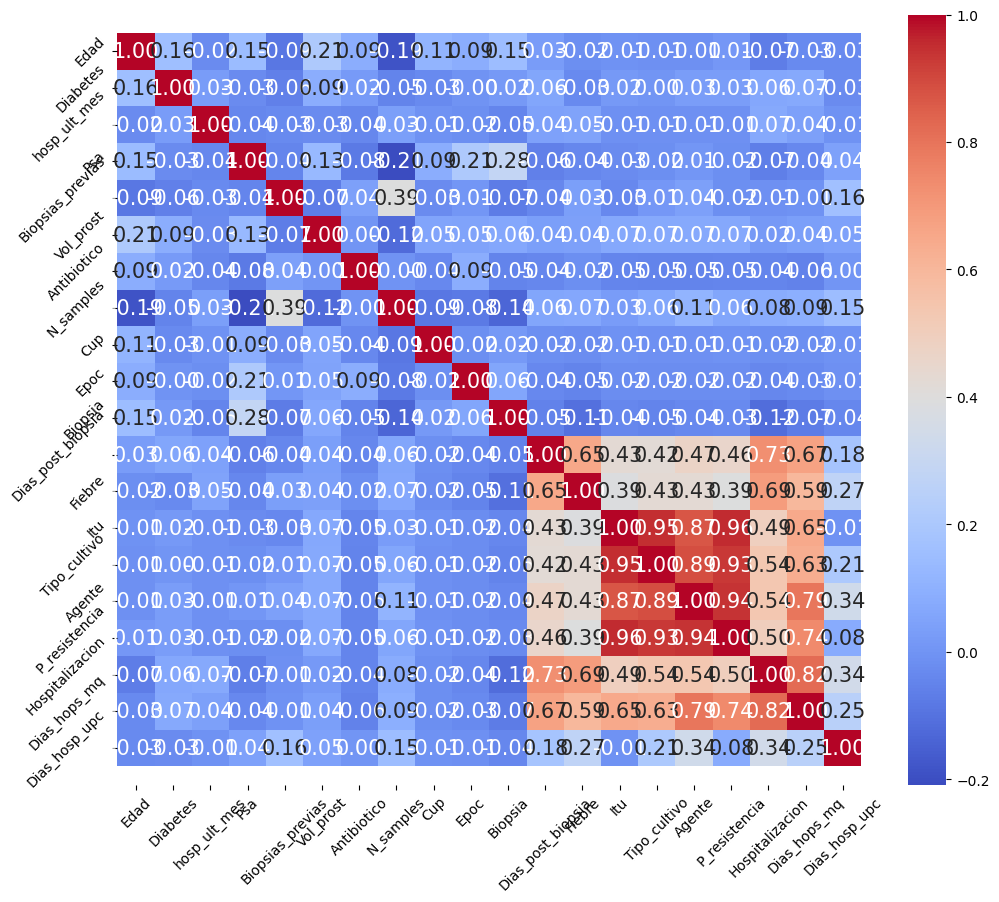

In [71]:
def plot_heatmap(corr):
    '''
    Función para graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

plot_heatmap(corr)

---
### Sinceramente no se ve nada, salvo que a partir de aproximadamente la columna biopsia, las correlaciones aumentan

---

In [72]:
# Obtener el indice de la columna Biopsia 
idx=df.columns.get_loc("Biopsia")
print("Column Index : "+ str(idx))



Column Index : 10


---
### Genero un subdataframe desde la columna biopsia en adelante

---

In [73]:
df2 = df.iloc[:, idx:]
df2.columns

Index(['Biopsia', 'Dias_post_biopsia', 'Fiebre', 'Itu', 'Tipo_cultivo',
       'Agente', 'P_resistencia', 'Hospitalizacion', 'Dias_hops_mq',
       'Dias_hosp_upc'],
      dtype='object')

---
### Creamos la correlacion en el nuevo dataframe

---

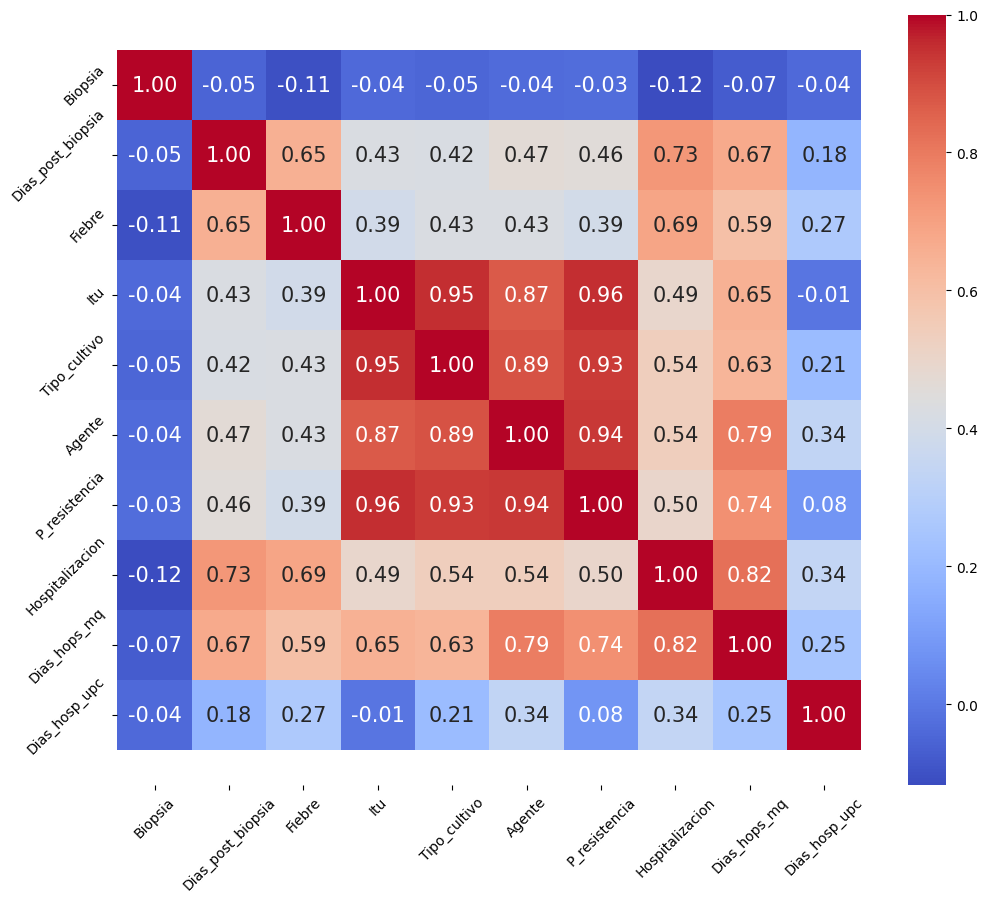

In [74]:
corr2 = df2.corr()
plot_heatmap(corr2)

In [75]:
# Me quedo con la columa que corresponde a Hospitalizacion

corr2["Hospitalizacion"].sort_values(ascending=False)

Hospitalizacion      1.000000
Dias_hops_mq         0.822868
Dias_post_biopsia    0.727748
Fiebre               0.688626
Agente               0.536928
Tipo_cultivo         0.535717
P_resistencia        0.496471
Itu                  0.491580
Dias_hosp_upc        0.341315
Biopsia             -0.116304
Name: Hospitalizacion, dtype: float64

---

### Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.
Me quedo con las 3 variables con mayor correlacion con Hospitalizacion

---

In [77]:
df3 = df2[["Dias_hops_mq","Dias_post_biopsia","Fiebre", "Hospitalizacion"]]
df3.head()

,Dias_hops_mq,Dias_post_biopsia,Fiebre,Hospitalizacion
0,2.0,1,1,1
1,5.0,1,1,1
2,4.0,1,1,1
3,5.0,1,1,1
4,4.0,1,1,1


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

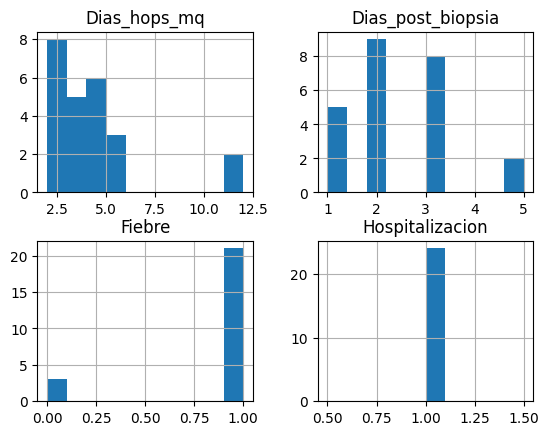

In [87]:
my_hist_yes = df3.loc[df3["Hospitalizacion"]==1].hist()

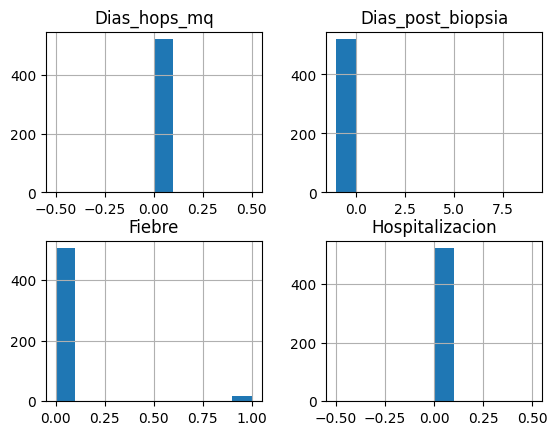

In [88]:
my_hist_no = df3.loc[df3["Hospitalizacion"]==0].hist()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [89]:
df3.to_csv("hospitalizados_clean.csv", index=False)